# Loading the Data

In [1]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Building the Dataset

In [2]:
from collections import Counter
Counter(y)

Counter({0: 250, 1: 250})

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
Counter(y_train)

Counter({0: 207, 1: 193})

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [6]:
Counter(y_train)

Counter({0: 200, 1: 200})

In [7]:
Counter(y_test)

Counter({0: 50, 1: 50})

# Training the Models

In [8]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
print(accuracy_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

0.85
0.8492462311557788
[[171  29]
 [ 31 169]]


In [10]:
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.81
0.819047619047619
[[38 12]
 [ 7 43]]


In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
print(accuracy_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

0.8975
0.8982630272952853
[[178  22]
 [ 19 181]]


In [13]:
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.89
0.8910891089108911
[[44  6]
 [ 5 45]]


In [14]:
from sklearn.metrics import precision_recall_curve, roc_curve
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3, method="predict_proba")
y_train_pred = y_train_pred[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

In [15]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="center right", fontsize=16) # Not shown in the book
plt.xlabel("Threshold", fontsize=16)        # Not shown
plt.grid(True)                              # Not shown

In [16]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_train_pred)

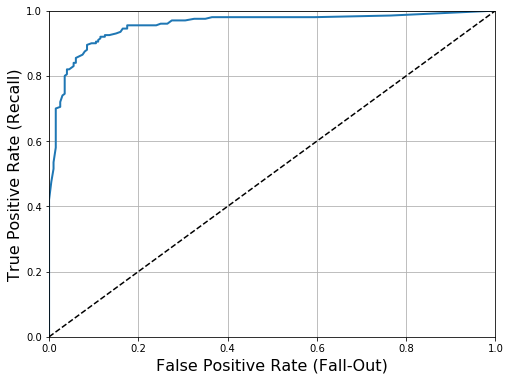

In [17]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)    

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

# Finetuning the Hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 6 (3×2) combinations of hyperparameters
    {'n_estimators': [80, 100, 120], 'max_features': [1, 2]},
    # then try 4 (2×2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [100, 120], 'max_features': [1,2]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (6+4)*5=50 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [1, 2],
                          'n_estimators': [80, 100, 120]},
                         {'bootstrap': [False], 'max_features': [1, 2],
                          'n_estimators': [100, 120]}],
             return_train_score=True, scoring='f1')

In [19]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [20]:
grid_search.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=120, random_state=42)

In [21]:
final_model = grid_search.best_estimator_

y_pred = final_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.89
0.8910891089108911
[[44  6]
 [ 5 45]]
